#  Supervised Learning - 15 types/models overview in one example


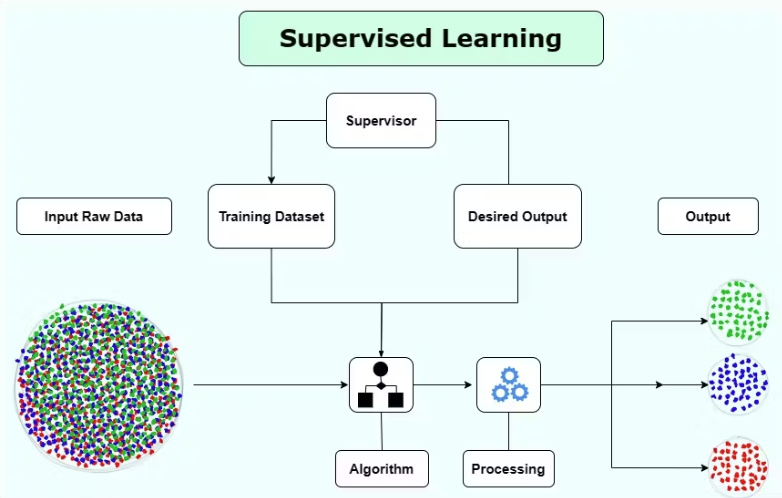

In [1]:
import time
start = time.time()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  # ignore warning

import os

In [3]:
train = pd.read_csv("Lesson21-titanic_train.csv")
test = pd.read_csv("Lesson21-titanic_test.csv")

#difference: train dataset has extra columns "Survived" 

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
passengerid = test.PassengerId #useful for recombining final DataFrame

print(train.info())
print("*"*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

In [6]:
train.isna().sum().sort_values(ascending=False)
round(train.isna().sum().sort_values(ascending=False)/len(train)*100,2)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64

In [7]:
# this def is to check the missing/NAN values' percentage for each feature

def missing_percentage(df):
    total = df.isna().sum().sort_values(ascending=False)
    percent = round(total/len(df)*100,2)
    df_percent = pd.concat([total,percent],keys=["missing count","missing percentage"],axis="columns")
    return df_percent 

In [8]:
missing_percentage(train)

,missing count,missing percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [9]:
missing_percentage(test)

,missing count,missing percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Name,0,0.00
Pclass,0,0.00
PassengerId,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00
Ticket,0,0.00


In [10]:
train.Embarked.value_counts(normalize=True,ascending = True)

percent = pd.DataFrame(train.Embarked.value_counts(normalize=True,ascending = True))

train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
# this def is to calculate the distribution of categorical features

def value_counts_distribution(df, feature):
    total = df[feature].value_counts(ascending = False)
    percent = round(df[feature].value_counts(normalize=True,ascending = False)*100,2)

    return pd.concat([total,percent],keys=["counts","percent"],axis=1)


In [12]:
value_counts_distribution(train,"Embarked")

,counts,percent
Embarked,,
S,644,72.44
C,168,18.90
Q,77,8.66


<Axes: >

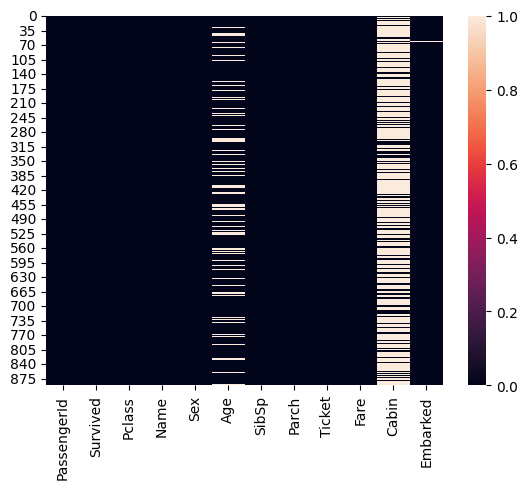

In [13]:
sns.heatmap(train.isna())

In [14]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train[train.Embarked.isna()]

#both paid Fare=80.0, Pclass=1, female - next is to see how the Fare distributed among Pclass and Embarked features. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Text(0.5, 1.0, 'Test set')

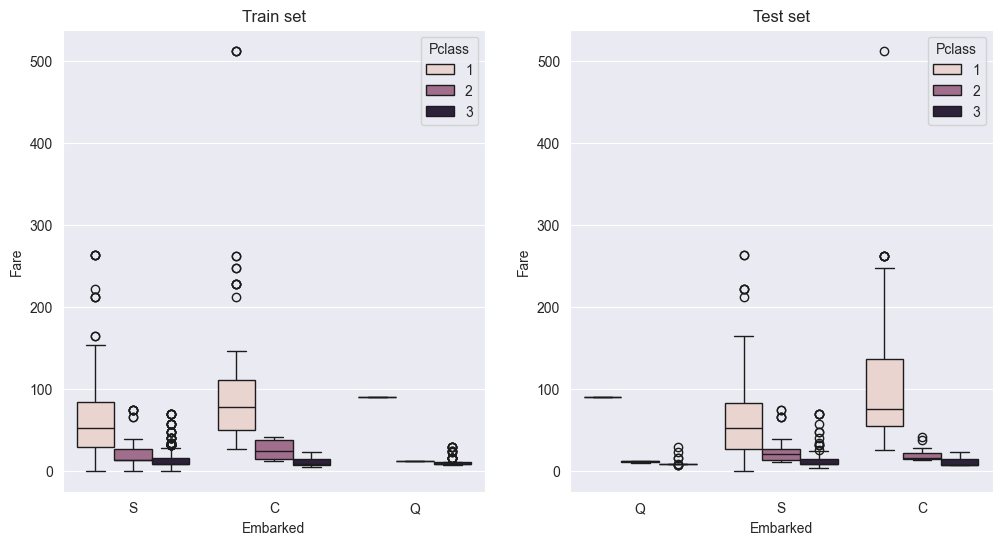

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))

plt.subplot(121) #for train dataset 
sns.boxplot(data=train, x="Embarked",y="Fare",hue="Pclass")
plt.title("Train set")


plt.subplot(122) #for test dataset 
sns.boxplot(data=test, x="Embarked",y="Fare",hue="Pclass")
plt.title("Test set")

In [17]:
train.groupby(["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

#### from the above data/plot, the average fare 80 & Pclass=1 are in C Embarked. so reasonable to fill the missing Embarked as "C"

In [18]:
train.Embarked.fillna("C", inplace=True)
test.Embarked.fillna("C",inplace=True)

In [19]:
print(train.isna().sum())
print("*"*50)
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
# concat train and test into a variable "all_data";
#In pd.concat(), the default for axis is 0 (concatenating rows), 
# and the default for ignore_index is False, meaning original indexes are kept and can duplicate

survivers = train["Survived"]

train = train.drop("Survived",axis=1)

all_data=pd.concat([train,test],axis=0) 


all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
all_data.Cabin.fillna("N",inplace=True) #assign NaN values to N for later processing and "N" values will be assigned back with fit values

In [22]:
all_data.Cabin = all_data.Cabin.map(lambda x:x[0])
all_data.Cabin

0      N
1      C
2      N
3      C
4      N
      ..
413    N
414    C
415    N
416    N
417    N
Name: Cabin, Length: 1309, dtype: object

In [23]:
#call the previous func to calculate the distribution 

value_counts_distribution(all_data,"Cabin")

,counts,percent
Cabin,,
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [24]:
all_data.groupby("Cabin")["Fare"].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [25]:
# N is assigned from NaN; so will skip the "N" Cabin below: 

def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "D"
    elif i>= 54 and i<80:
        a = "E"
    elif i>=80 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [26]:
with_N = all_data[all_data.Cabin=="N"]
without_N = all_data[all_data.Cabin!="N"]
with_N

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,N,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,N,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,N,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,N,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,N,S


In [27]:
# apply cabin_estimator function to assign cabin to with_N data (without_N are real data, should not be assigned here) 

with_N["Cabin"] = with_N["Fare"].map(cabin_estimator)


In [28]:

with_N["Cabin"].value_counts()

Cabin
G    681
F    171
T     73
E     40
A     27
B     13
D      5
C      4
Name: count, dtype: int64

In [29]:
all_data = pd.concat([with_N, without_N],axis=0)


In [30]:

all_data.sort_values(by = "PassengerId", inplace=True)

In [31]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,G,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,G,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,G,S


In [32]:
# assign back the train and test sets from the all_data

train = all_data[:891]
test = all_data[891:]
train["Survived"] = survivers 

train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,F,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1


In [33]:
train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
dtype: int64

In [34]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [35]:
test[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [36]:
# for this missing value, will be filled with averaged data based on the Pclass,Embarked, Sex)

missing_fare_value = test[(test.Pclass==3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()

missing_fare_value


np.float64(12.718872000000001)

In [37]:
test.Fare.fillna(missing_fare_value, inplace=True)

In [38]:
# so far feature with missing values is Age, and this will be handled next

<Axes: xlabel='Sex', ylabel='Survived'>

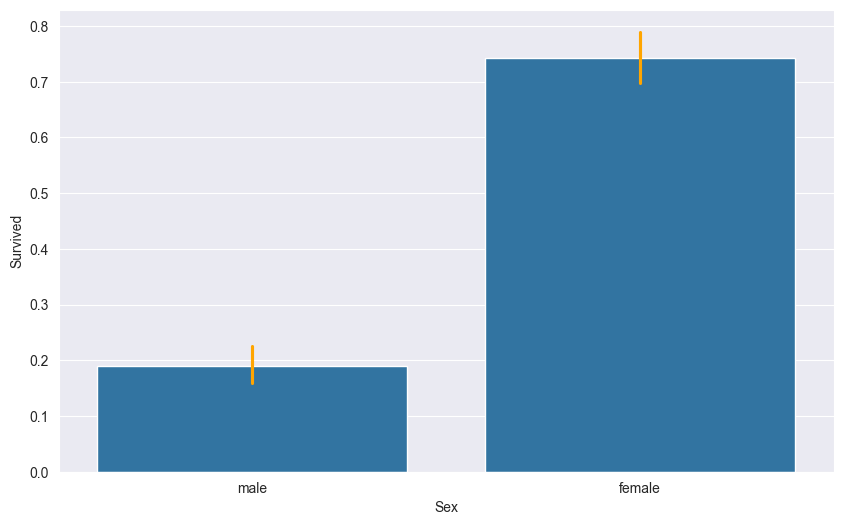

In [39]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.barplot(data=train, x="Sex",y="Survived",errcolor="orange")

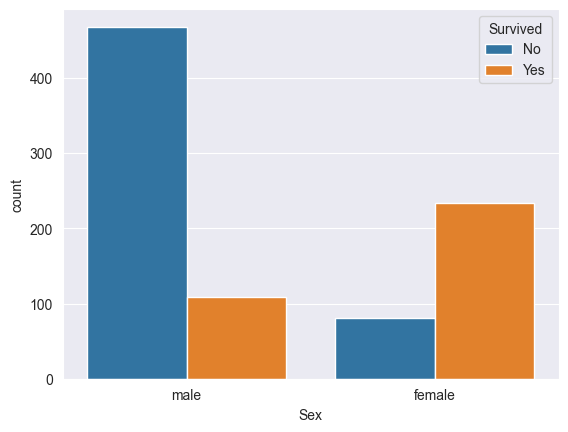

In [40]:
sns.countplot(x="Sex",hue="Survived",data=train)

plt.legend(title='Survived', labels=['No', 'Yes'])

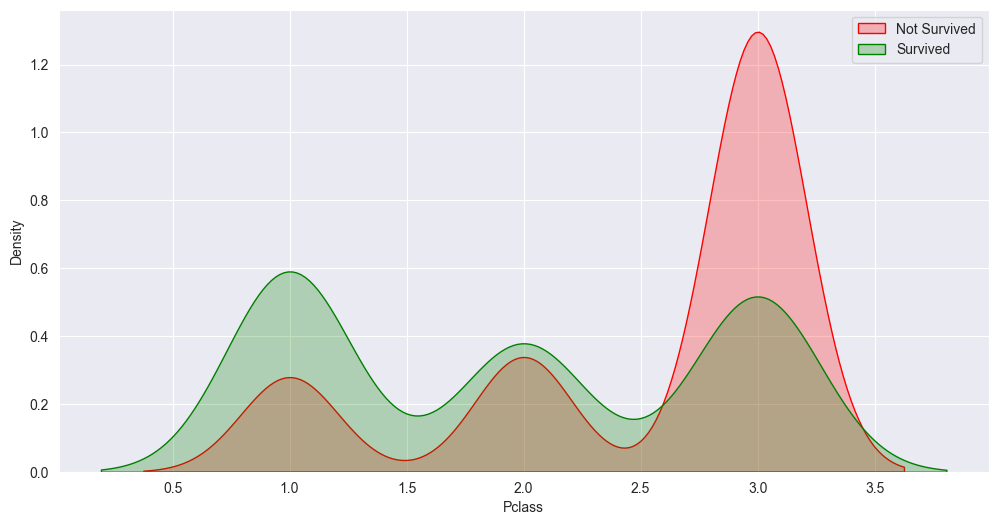

In [41]:
plt.figure(figsize=(12,6))

sns.kdeplot(train.Pclass[train.Survived==0],color="red",shade=True,label="Not Survived")
sns.kdeplot(train.Pclass[train.Survived==1],color="green",shade=True,label="Survived")

plt.legend()


Text(0.5, 1.0, 'Survived')

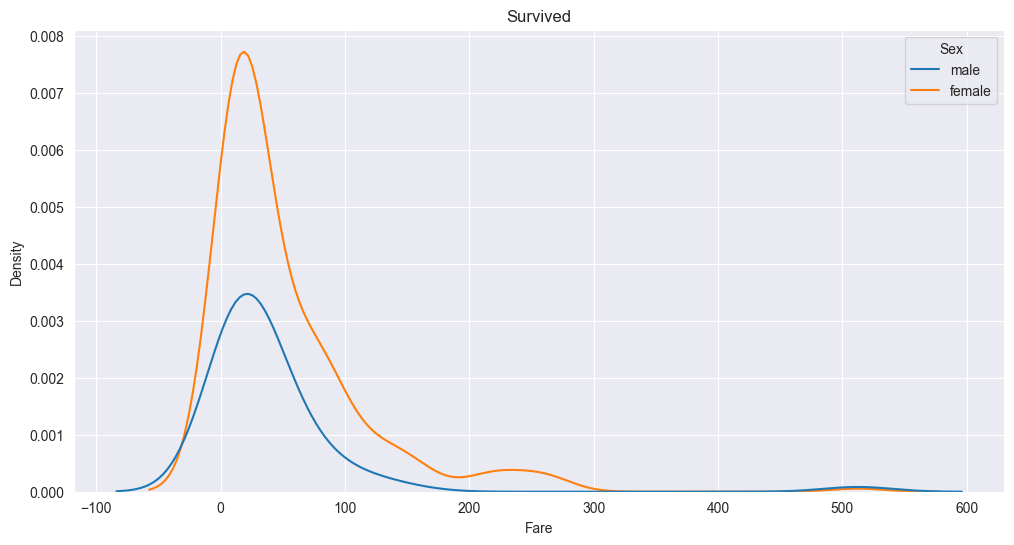

In [42]:
plt.figure(figsize=(12,6))

# sns.kdeplot(data=train, x=train.Fare[train.Survived==0],hue="Sex",shade=True, label="Not Survived")
sns.kdeplot(data=train, x=train.Fare[train.Survived==1],hue="Sex",shade=False)
plt.title("Survived")
# plt.legend()

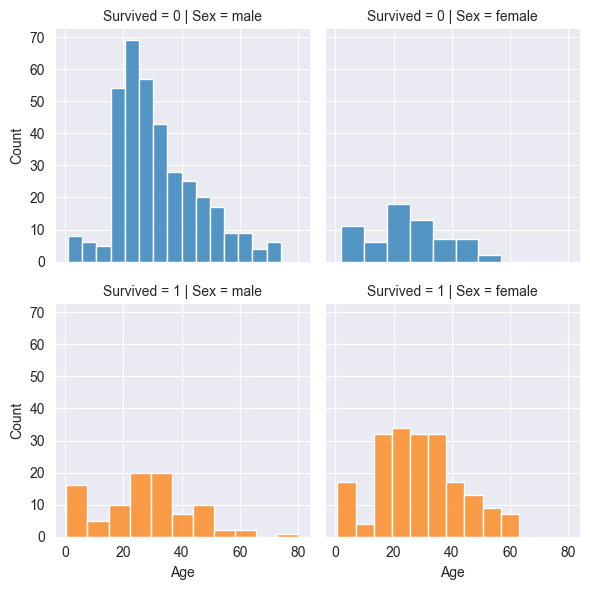

In [43]:
g = sns.FacetGrid(train,col="Sex",row="Survived", hue="Survived")

g.map(sns.histplot, 'Age',edgecolor="white")

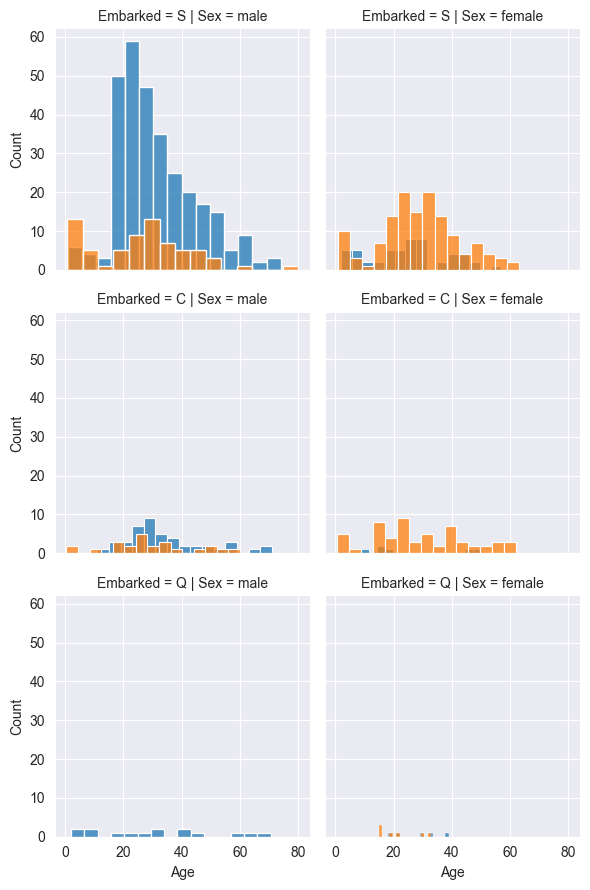

In [44]:
g = sns.FacetGrid(train,col="Sex",row="Embarked", hue="Survived")

g.map(sns.histplot, 'Age',edgecolor="white",bins=15)

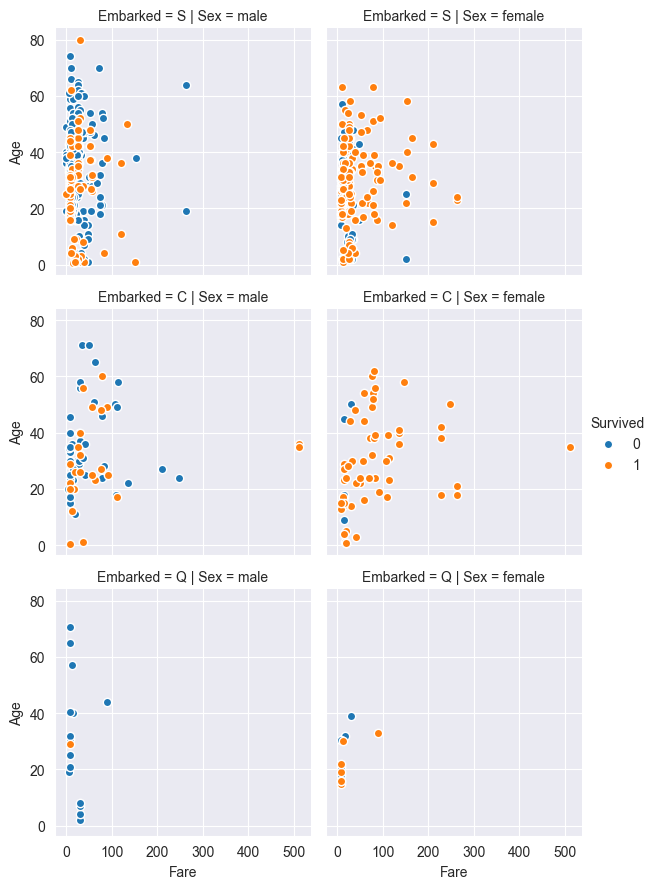

In [45]:
g = sns.FacetGrid(train,col="Sex",row="Embarked", hue="Survived")

g.map(plt.scatter, "Fare",'Age', edgecolor="white").add_legend()

In [46]:
# process categorical data (object dtype) for computer to read 
#1 for male in the "Sex" columns 

train["Sex"] = train["Sex"].apply(lambda x: 0 if x=="female" else 1)
test.Sex = test.Sex.map({"female":0,"male":1})

In [47]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [48]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.572384
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.851741
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [49]:
train.groupby("Survived").describe()

PassengerId                                                     \
               count        mean         std  min     25%    50%    75%   
Survived                                                                  
0              549.0  447.016393  260.640469  1.0  211.00  455.0  675.0   
1              342.0  444.368421  252.358840  2.0  250.75  439.5  651.5   

                Pclass            ... Parch        Fare                        \
            max  count      mean  ...   75%  max  count       mean        std   
Survived                          ...                                           
0         891.0  549.0  2.531876  ...   0.0  6.0  549.0  22.117887  31.388207   
1         890.0  342.0  1.950292  ...   1.0  5.0  342.0  48.395408  66.596998   

                                              
          min      25%   50%   75%       max  
Survived                                      
0         0.0   7.8542  10.5  26.0  263.0000  
1         0.0  12.4750  26.0  57.0  512.3292  

[2 rows x 56 columns]

In [50]:
train.corr(numeric_only = True)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Sex,0.042939,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.543351
Age,0.036847,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [51]:
abs(train.corr(numeric_only = True)["Survived"]).sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

In [52]:
pd.DataFrame(abs(train.corr(numeric_only = True)["Survived"]).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Text(0.5, 1.0, 'Masked Correlation Heatmap')

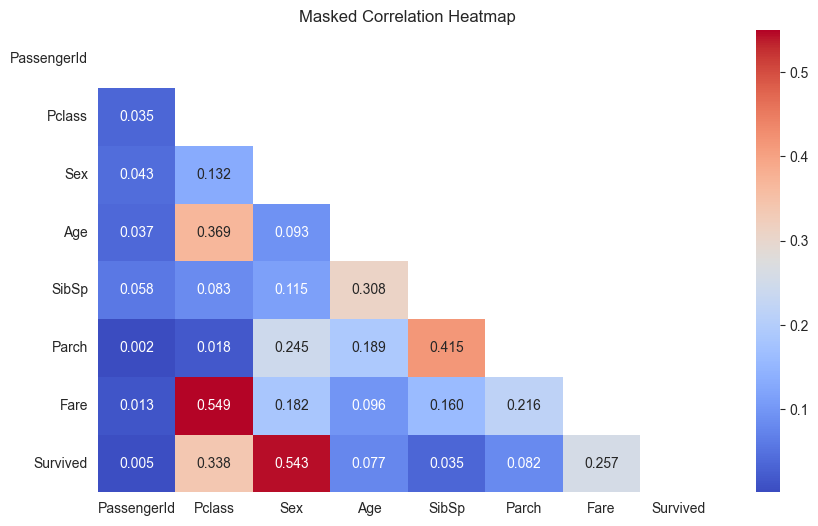

In [53]:
# heatmap to see the correlation between features 

mask = np.triu(np.ones_like(abs(train.corr(numeric_only=True)), dtype=np.bool))
sns.set_style("white")
plt.figure(figsize=(10, 6))
sns.heatmap(abs(train.corr(numeric_only=True)), mask=mask, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Masked Correlation Heatmap')

In [54]:
train_Embarked_dummies = pd.get_dummies(train["Embarked"],drop_first=True, dtype=int)
train_Embarked_dummies 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [55]:
test_Embarked_dummies = pd.get_dummies(test["Embarked"],drop_first=True, dtype=int)
test_Embarked_dummies 

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.5+ KB


In [57]:
drop_columns = ["PassengerId","Name","Cabin","Ticket","Embarked"]
train = pd.concat([train, train_Embarked_dummies], axis=1).drop(columns=drop_columns)
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Q,S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,1,0,1
3,1,0,35.0,1,0,53.1000,1,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,1,0,1
888,3,0,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [58]:
test = pd.concat([test, test_Embarked_dummies], axis=1).drop(columns=drop_columns)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0,1
414,1,0,39.0,0,0,108.9000,0,0
415,3,1,38.5,0,0,7.2500,0,1
416,3,1,NaN,0,0,8.0500,0,1


In [59]:
# RandomForestRegressor to predict and fill missing Age values

In [60]:
from sklearn.ensemble import RandomForestRegressor

def completing_age(df):
        
    temp_train = df.loc[df["Age"].notnull()]
    temp_test = df.loc[df["Age"].isna()]
    
    
    y = temp_train["Age"]
    x = temp_train.drop("Age",axis=1)
    
    rfr = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
    rfr.fit(x,y)
    predict_age = rfr.predict(temp_test.drop("Age",axis=1))
    
    df.loc[df["Age"].isna(),"Age"] = predict_age
    
    return df

In [61]:
completing_age(train)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Q,S
0,3,1,22.0000,1,0,7.2500,0,0,1
1,1,0,38.0000,1,0,71.2833,1,0,0
2,3,0,26.0000,0,0,7.9250,1,0,1
3,1,0,35.0000,1,0,53.1000,1,0,1
4,3,1,35.0000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0000,0,0,13.0000,0,0,1
887,1,0,19.0000,0,0,30.0000,1,0,1
888,3,0,23.6313,1,2,23.4500,0,0,1
889,1,1,26.0000,0,0,30.0000,1,0,0


In [62]:
completing_age(test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,34.500000,0,0,7.8292,1,0
1,3,0,47.000000,1,0,7.0000,0,1
2,2,1,62.000000,0,0,9.6875,1,0
3,3,1,27.000000,0,0,8.6625,0,1
4,3,0,22.000000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,1,26.615067,0,0,8.0500,0,1
414,1,0,39.000000,0,0,108.9000,0,0
415,3,1,38.500000,0,0,7.2500,0,1
416,3,1,26.615067,0,0,8.0500,0,1


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
 7   Q         891 non-null    int64  
 8   S         891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   Q       418 non-null    int64  
 7   S       418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.4 KB


<Figure size 1200x500 with 0 Axes>

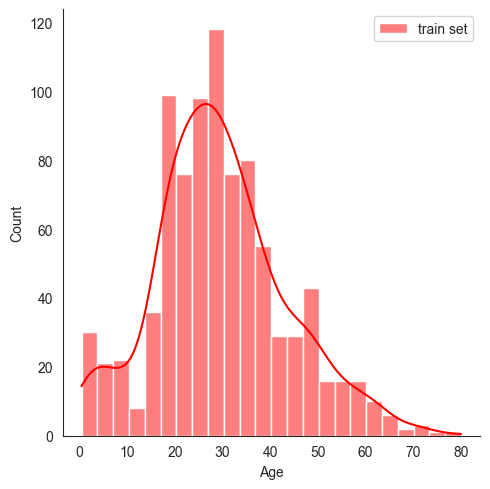

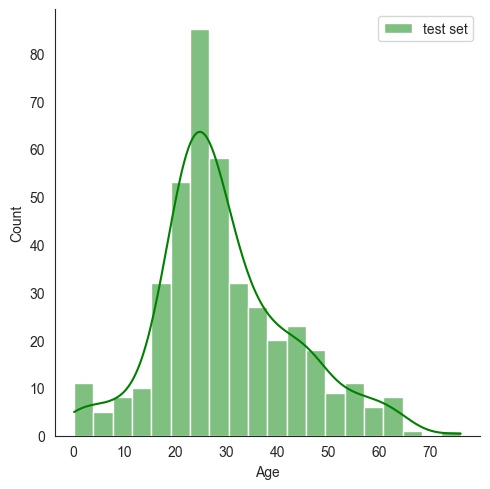

In [65]:
plt.figure(figsize=(12,5))

sns.displot(train.Age,kde=True, color="red", label="train set")
plt.legend()
sns.displot(test.Age,kde=True, color="green", label="test set")
plt.legend()

In [66]:
# NOW separating independent and dependent variables

x = train.drop(["Survived"],axis=1)
y = train["Survived"]

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# (0) Pre_processing data into train, test

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
242,2,1,29.000000,0,0,10.5000,0,1
344,2,1,36.000000,0,0,13.0000,0,1
170,1,1,61.000000,0,0,33.5000,0,1
187,1,1,45.000000,0,0,26.5500,0,1
800,2,1,34.000000,0,0,13.0000,0,1
...,...,...,...,...,...,...,...,...
835,1,0,39.000000,1,1,83.1583,0,0
192,3,0,19.000000,1,0,7.8542,0,1
629,3,1,25.412536,0,0,7.7333,1,0
559,3,0,36.000000,1,0,17.4000,0,1


In [68]:
train.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Q,S
706,2,0,45.000000,0,0,13.5000,1,0,1
506,2,0,33.000000,0,2,26.0000,1,0,1
810,3,1,26.000000,0,0,7.8875,0,0,1
196,3,1,47.555709,0,0,7.7500,0,1,0
824,3,1,2.000000,4,1,39.6875,0,0,1


In [69]:
# feature engineering - if the magnititude of feature values vary a lot

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

x_test

array([[ 8.47092403e-01,  7.24083334e-01, -5.94238444e-01, ...,
        -3.73140283e-01, -3.15643781e-01, -1.65783825e+00],
       [ 8.47092403e-01,  7.24083334e-01,  4.73341186e-01, ...,
        -5.16187627e-01, -3.15643781e-01,  6.03195154e-01],
       [ 8.47092403e-01,  7.24083334e-01, -1.64510627e+00, ...,
        -6.94429204e-02,  3.16812832e+00, -1.65783825e+00],
       ...,
       [ 8.47092403e-01, -1.38105651e+00, -1.47086215e+00, ...,
        -2.09558212e-01, -3.15643781e-01, -1.65783825e+00],
       [-3.43631824e-01, -1.38105651e+00,  3.17140302e-01, ...,
         4.41825154e-04, -3.15643781e-01,  6.03195154e-01],
       [-3.43631824e-01, -1.38105651e+00, -4.09617689e-01, ...,
        -4.03336705e-01, -3.15643781e-01,  6.03195154e-01]],
      shape=(295, 8))

In [70]:
# transforming "x"
x1 = x
x = sc.fit_transform(x)

# (1) LogisticRegression Model

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,accuracy_score

logreg = LogisticRegression(solver = "liblinear",penalty = "l1",random_state=42)

logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Predicted Non_Survived","Predicted Survived"],index=["Real Non_Survived","Real Survived"])


,Predicted Non_Survived,Predicted Survived
Real Non_Survived,156,28
Real Survived,32,79


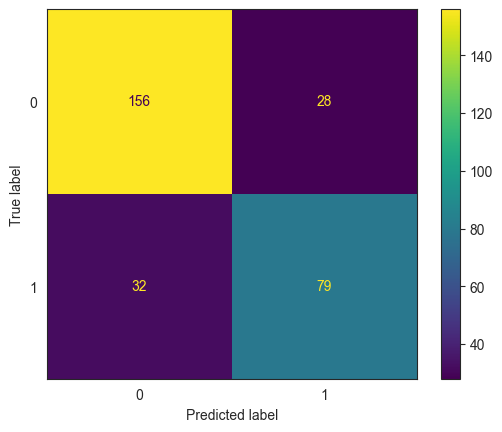

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       184
           1       0.74      0.71      0.72       111

    accuracy                           0.80       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.80      0.80      0.80       295



In [75]:
accuracy_score(y_test,y_pred)

0.7966101694915254

In [76]:
logreg.score(x_test,y_test)

0.7966101694915254

0.8525998824911868


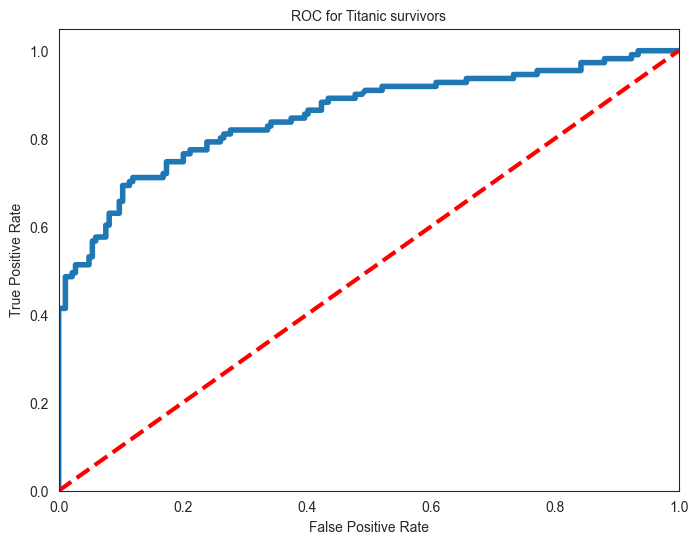

In [77]:
from sklearn.metrics import roc_curve,auc

y_score = logreg.decision_function(x_test)

FPR,TPR, _ = roc_curve(y_test,y_score)
ROC_AUC = auc(FPR,TPR)
print(ROC_AUC)

plt.figure(figsize=(8,6))
plt.plot(FPR,TPR,label="ROC curve (area= %0.2f)"%ROC_AUC,linewidth=4)
plt.plot([0,1],[0,1],"r--",linewidth=3)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 10)
plt.title('ROC for Titanic survivors', fontsize= 10)
plt.show()

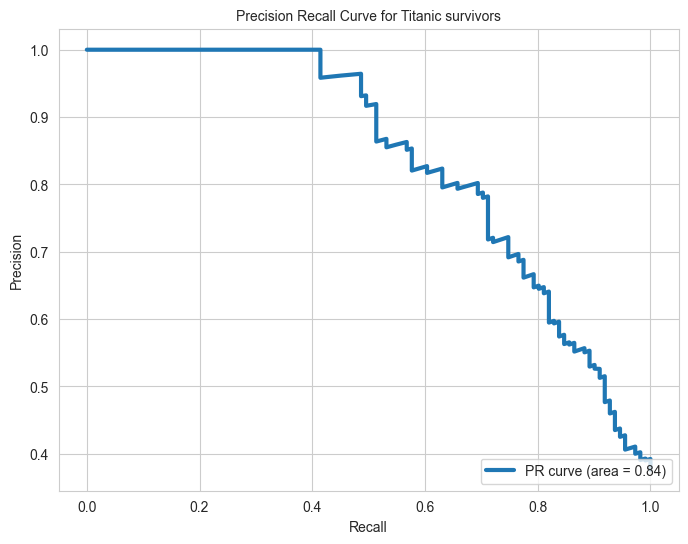

In [78]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)
precision,recall,_ = precision_recall_curve(y_test,y_score)
PR_AUC = auc(recall,precision)

plt.figure(figsize=[8,6])
sns.set_style("whitegrid")
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=3)
plt.xlabel('Recall', fontsize=10)
plt.ylabel('Precision', fontsize=10)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=10)
plt.legend(loc="lower right")
plt.show()

# (1) GridSearchCV 

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,accuracy_score

# C_vals is the alpla value of lasso and ridge regression(as 
# alpha increases the model complexity decreases,)

## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'C': C_vals}

logreg = LogisticRegression()
## Calling on GridSearchCV object. 
grid = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid = param,
    scoring = 'accuracy',
    n_jobs =-1,
    cv = cv
)
## Fitting the model
grid.fit(x, y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.2, 0.3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold a

In [80]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8071748878923767
{'C': 0.6}
LogisticRegression(C=0.6)


In [81]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(x,y)

0.8047138047138047

# (2) RandomizedSearchCV

In [82]:
from sklearn.model_selection import RandomizedSearchCV

rand1 = RandomizedSearchCV(
    estimator=LogisticRegression(), 
    param_distributions = param,
    scoring = 'accuracy',
    n_jobs =-1,
    cv = cv
)
## Fitting the model
rand1.fit(x, y)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'C': [0.2, 0.3, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,

In [83]:
## Getting the best of everything. 
print (rand1.best_score_)
print (rand1.best_params_)
print(rand1.best_estimator_)

logreg_rand = rand1.best_estimator_
logreg_rand.score(x,y)

0.8130044843049327
{'C': 0.7}
LogisticRegression(C=0.7)


0.8047138047138047

# (3) Decision Tree

In [84]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

max_depth = range(1,20)
max_feature = [15,18,21,24,27,30,33,"auto"]
criterion = ["entropy","gini"]

param = {"max_depth":max_depth,
        "max_features":max_feature,
        "criterion":criterion}

grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param,verbose=False,
                    cv=StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state=1),n_jobs=-1)

grid.fit(x,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['entropy', 'gini'], 'max_depth': range(1, 20), 'max_features': [15, 18, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candida

In [85]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(x,y)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 18}
0.8251121076233184
DecisionTreeClassifier(max_depth=4, max_features=18)


0.8417508417508418

# (4) RandomForest 

In [86]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, StratifiedKFold,StratifiedShuffleSplit

n_estimators = [130,140,150,160,170]
max_depth = range(1,10)
criterions = ["gini","entropy"]
cv = StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=15)

parameters = {"n_estimators":n_estimators,"max_depth":max_depth,"criterion":criterions}

grid = GridSearchCV(estimator = RandomForestClassifier (max_features = "sqrt"),
                    param_grid = parameters,
                    cv=cv,
                    n_jobs=-1)
grid.fit(x,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'n_estimators': [130, 140, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candi

In [87]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

rf_grid = grid.best_estimator_
rf_grid.score(x,y)

0.8484304932735427
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 130}
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=130)


0.9169472502805837

In [88]:
from sklearn.metrics import classification_report 

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

print(classification_report(y_test,y_pred,labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       184
           1       0.95      0.73      0.83       111

    accuracy                           0.88       295
   macro avg       0.91      0.85      0.87       295
weighted avg       0.89      0.88      0.88       295



## feature_importances_

In [89]:
column_names = x1.columns

feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                   columns=["importance"])
feature_importances.sort_values(by = "importance", ascending = False)

,importance
Sex,0.306984
Fare,0.226648
Age,0.219441
Pclass,0.110163
SibSp,0.058365
Parch,0.040288
S,0.025464
Q,0.012647


# (5) AdaBoost

In [90]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(x_train, y_train)

y_pred = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8203389830508474

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
n_estimators = [80,100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r}
grid = GridSearchCV(AdaBoostClassifier(estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(x,y) 

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",AdaBoostClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 1, ...], 'n_estimators': [80, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score

In [92]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

ada_grid = grid.best_estimator_

ada_grid.predict(x_test) 

ada_grid.score(x,y)

0.8188340807174888
{'learning_rate': 1, 'n_estimators': 100}
AdaBoostClassifier(learning_rate=1, n_estimators=100)


0.819304152637486

# (6) Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(x_train, y_train)
y_pred = gradient_boost.predict(x_test)
gradient_accuracy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accuracy)

0.824


In [94]:
grid = GridSearchCV(GradientBoostingClassifier(),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(x,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",GradientBoostingClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 1, ...], 'n_estimators': [80, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : t

In [95]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

gb_grid = grid.best_estimator_
gb_grid.score(x,y)

0.8417040358744396
{'learning_rate': 0.1, 'n_estimators': 175}
GradientBoostingClassifier(n_estimators=175)


0.9248035914702581

# (7) Support Vector Machine (SVM) 

In [96]:
from sklearn.svm import SVC  #(SVC:Support Vector Classifier)

Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(x,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC(probability=True)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.001, 0.01, ...], 'gamma': [0.0001, 0.001, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is a

In [97]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.predict(x_test)
svm_grid.score(x,y)

0.841255605381166
{'C': 2, 'gamma': 0.1}
SVC(C=2, gamma=0.1, probability=True)


0.8428731762065096

# (8) Xgboost

In [98]:
from xgboost import XGBClassifier  #(pip install xgboost if "ModuleNotFoundError: No module named 'xgboost'")
#import xgboost as xgb
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)
y_pred = XGBC.predict(x_test)
XGBC_accy = round(accuracy_score(y_pred, y_test), 3)

XGBC.predict(x_test)

print(XGBC_accy)

0.847


In [99]:
n_estimators = [1000];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1]

parameters = {'estimators':n_estimators,
              'learning_rate':learning_r        }

grid = GridSearchCV(XGBClassifier(),
                                 param_grid=param,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(x,y) 

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['entropy', 'gini'], 'max_depth': range(1, 20), 'max_features': [15, 18, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter

In [100]:
## Getting the best of everything. ## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)
xgb_grid = grid.best_estimator_
xgb_grid.predict(x_test)
xgb_grid.score(x,y)


0.8309701492537315
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 15}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_features=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)


0.9281705948372615

# (9) Bagging Classifier

In [101]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
n_estimators = range(10,200,10)
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,}
grid = GridSearchCV(BaggingClassifier(estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(x,y) 

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",BaggingClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_estimators': range(10, 200, 10)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the

In [102]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

bagging_grid = grid.best_estimator_
bagging_grid.score(x,y)

0.8212686567164178
{'n_estimators': 140}
BaggingClassifier(n_estimators=140)


0.9887766554433222

# (10) Extra Trees Classifier

In [103]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(x, y)
y_pred = ExtraTreesClassifier.predict(x_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.922


# (11) K-Nearest Neighbor classifier(KNN) w. GridSearchCV

In [104]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
## calling on the model oject. 

knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, x,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(np.round(accuracies,3)))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))


Cross-Validation accuracy scores:[0.812 0.798 0.776 0.816 0.852 0.789 0.794 0.852 0.843 0.821]
Mean Cross-Validation accuracy score: 0.815


In [105]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x,y, cv = cv, scoring = 'accuracy',n_jobs=-1)
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [np.float64(0.7668161434977578), np.float64(0.7964125560538117), np.float64(0.815695067264574), np.float64(0.8170403587443946), np.float64(0.8152466367713004), np.float64(0.8183856502242153), np.float64(0.8112107623318385), np.float64(0.8121076233183857), np.float64(0.8139013452914797), np.float64(0.8192825112107623), np.float64(0.810762331838565), np.float64(0.8165919282511211), np.float64(0.8139013452914797), np.float64(0.8174887892376681), np.float64(0.815695067264574), np.float64(0.8121076233183857), np.float64(0.8062780269058296), np.float64(0.8071748878923767), np.float64(0.8062780269058297), np.float64(0.8089686098654708), np.float64(0.8008968609865471), np.float64(0.8), np.float64(0.7964125560538117), np.float64(0.7995515695067266), np.float64(0.8004484304932735), np.float64(0.8013452914798206), np.float64(0.7964125560538117), np.float64(0.8013452914798208), np.float64(0.7982062780269058), np.float64(0.8)]

Mean accuracy score: 0.8065321375186846


Text(0, 0.5, 'mean accuracy_score')

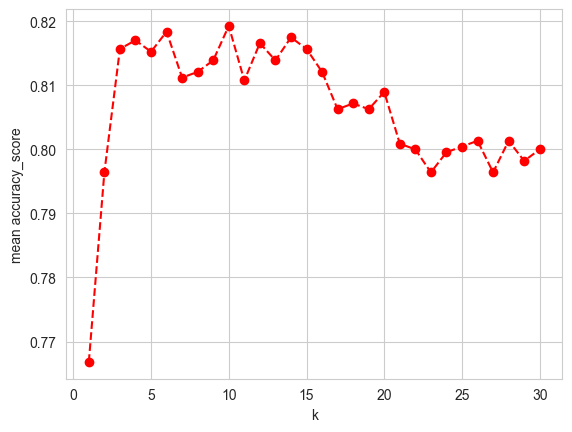

In [106]:
plt.plot(k_range, k_scores,"ro",linestyle="--")
plt.xlabel("k")
plt.ylabel("mean accuracy_score")

In [107]:
from sklearn.model_selection import GridSearchCV

## trying out multiple values for k
k_range = range(1,31)

## 
weights_options=['uniform','distance']

# 
param = {'n_neighbors':k_range, 'weights':weights_options}

## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(x,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the sc

In [108]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(x,y)

0.8264925373134329
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier()


0.8698092031425365

## (12) K-Nearest Neighbor classifier(KNN) w. RandomizedSearchCV

In [109]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(x,y)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",40
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-

In [110]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(x,y)

0.8115671641791045
{'weights': 'uniform', 'n_neighbors': 14}
KNeighborsClassifier(n_neighbors=14)


0.8406285072951739

# (13) Gaussian Naive Bayes

In [111]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaus = GaussianNB()
gaus.fit(x_train, y_train)

y_pred = gaus.predict(x_test)
gaus_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaus_accy)

0.78


# (14) Gaussian Naive Bayes w. Gaussian Process Classifier

In [112]:
from sklearn.gaussian_process import GaussianProcessClassifier

GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(x_train,y_train)
y_pred = GaussianProcessClassifier.predict(x_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

0.827


# (15) VotingClassifier

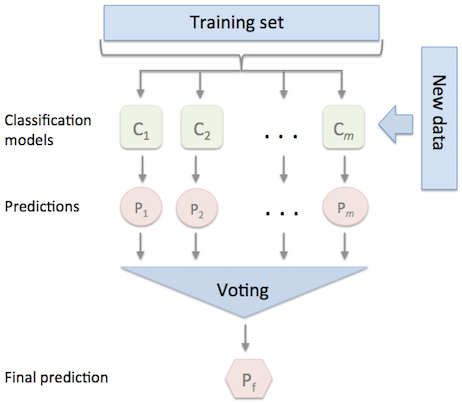

In [113]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', logreg_grid),
    ('lr_grid1', logreg_rand),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting',gb_grid),
    ('decision_tree_grid',dectree_grid),
    ('knn_classifier', knn_grid),
    ('knn_classifier1', knn_ran_grid),
    ('XGB_Classifier', xgb_grid),
    ('bagging_classifier', bagging_grid),
    ('adaBoost_classifier',ada_grid),
    ('ExtraTrees_Classifier', ExtraTreesClassifier),
    ('gaus_classifier', gaus),
    ('gaussian_process_classifier', GaussianProcessClassifier)
   
],voting='hard')

voting_classifier = voting_classifier.fit(x,y)
voting_classifier

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('lr_grid', ...), ('lr_grid1', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'hard'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.6
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [114]:
y_pred = voting_classifier.predict(x_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.858


In [115]:
all_models = [logreg_grid,
              logreg_rand,
              knn_grid, 
              knn_ran_grid,
              gb_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              ada_grid,
              ExtraTreesClassifier,
              svm_grid,
              gaus,
              GaussianProcessClassifier,              
              xgb_grid,
              voting_classifier]

c = {}
# for i in all_models:
#     print("{}\n*******************************************************************************\n".format(i))
#     a = i.predict(x_test)
#     b = accuracy_score(a, y_test)
#     c[i] = b


for i in all_models:
    print("{}".format(i)+ "\n" + "*"*50 +"\n")
    a = i.predict(x_test)
    b = accuracy_score(y_test,a)
    c[i] = b

LogisticRegression(C=0.6)
**************************************************

LogisticRegression(C=0.7)
**************************************************

KNeighborsClassifier()
**************************************************

KNeighborsClassifier(n_neighbors=14)
**************************************************

GradientBoostingClassifier(n_estimators=175)
**************************************************

DecisionTreeClassifier(max_depth=4, max_features=18)
**************************************************

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=130)
**************************************************

BaggingClassifier(n_estimators=140)
**************************************************

AdaBoostClassifier(learning_rate=1, n_estimators=100)
**************************************************

ExtraTreesClassifier()
**************************************************

SVC(C=2, gamma=0.1, probability=True)
********************************************

In [116]:
c

{LogisticRegression(C=0.6): 0.8033898305084746,
 LogisticRegression(C=0.7): 0.8033898305084746,
 KNeighborsClassifier(): 0.864406779661017,
 KNeighborsClassifier(n_neighbors=14): 0.8406779661016949,
 GradientBoostingClassifier(n_estimators=175): 0.864406779661017,
 DecisionTreeClassifier(max_depth=4, max_features=18): 0.8508474576271187,
 RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=130): 0.8847457627118644,
 BaggingClassifier(n_estimators=140): 0.9389830508474576,
 AdaBoostClassifier(learning_rate=1, n_estimators=100): 0.8067796610169492,
 ExtraTreesClassifier(): 0.9220338983050848,
 SVC(C=2, gamma=0.1, probability=True): 0.8305084745762712,
 GaussianNB(): 0.7796610169491526,
 GaussianProcessClassifier(): 0.8271186440677966,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, criterion='entropy', device=None,
               early_stopping_rounds=None, 

In [117]:
(max(c, key=c.get))

,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeClassifier`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",140
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",None
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `... versionadded:: 0.17 *warm_start* constructor parameter.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


In [118]:
passengerid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [119]:
test_prediction = (max(c, key=c.get)).predict(test)
#The code (max(c, key=c.get)).predict(test) finds the key with the highest value in a dictionary c, 
# treats that key as a model/estimator, and then uses its predict() method on test data

submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

In [120]:
end = time.time()
hours, rem = divmod(end-start, 3600) 
#divmod(dividend, divisor) The function takes two non-complex numeric arguments, a (dividend) and b (divisor), and returns the pair (a // b, a % b)

minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:02:21.93
